<a href="https://colab.research.google.com/github/TurcsikZ/ZSPD-Deep-learning-projekt/blob/main/Data_discovering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> ZSPD Project - Heart MRI superresolution </h1>

<h2> 1.Introduction </h2>

<p> In our project, the 4D images is used. The shape of these images is the following: (X,Y,Z_slices,T_time). We would like to use as image as possible, therefore first, we are focusing on the converting of images. Ater converting them, the low resolution images are made.</p>
<p> In this notebook, we will show the original images, how it looks like, what we can see in it. We will make the low resolution images, and cut the actual heart from the images. We want to cut the heart out because in the end we want the model to learn mainly the heart not the surrounding tissue. We will show, how we could create our new folder structure.</p>

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from data_preparation import downsample2d, bbox, crop_img

In [3]:
data_path = './data/'

<h2> 2.Data discovering </h2>
<p> Using the following code to load the data. Our data is in nifti file, so we use the nibabel packages for it. In these images, we can see not just the heart, but all other human organs also.</p>

C:\Users\Lenovo\Anaconda3\envs\DLP\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  


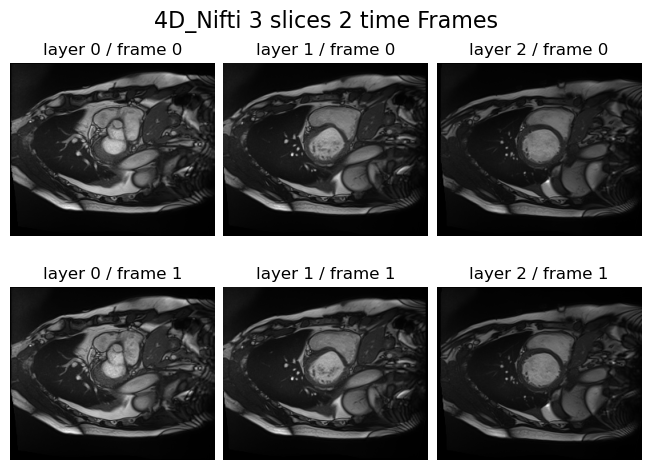

In [4]:
nii_img  = nib.load(os.path.join(data_path,'raw_data/patient001/','patient001_4d.nii.gz'))
nii_data = nii_img.get_fdata()

number_of_frames = 2
number_of_slices = 3

fig, ax = plt.subplots(number_of_frames, number_of_slices,constrained_layout=True)
fig.canvas.set_window_title('4D Nifti Image')
fig.suptitle('4D_Nifti 3 slices 2 time Frames', fontsize=16)
#-------------------------------------------------------------------------------
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()

for slice in range(number_of_slices):
    for frame in range(number_of_frames):
        ax[frame, slice].imshow(nii_data[:,:,slice,frame],cmap='gray', interpolation=None)
        ax[frame, slice].set_title("layer {} / frame {}".format(slice, frame))
        ax[frame, slice].axis('off')

plt.show() 

<p> Shape of our data: </p>

In [5]:
nii_data.shape

(216, 256, 10, 30)

<p> Our data contains 2D slices images, but we will not use of them in our project. A little example of this kind of image: </p>

In [6]:
nii_img_frame  = nib.load(os.path.join(data_path,'raw_data/patient001/','patient001_frame01.nii.gz'))
nii_data_frame = nii_img_frame.get_fdata()
nii_data_frame.shape

(216, 256, 10)

<p> Our data contains the position of the heart, which will be used for the segmentation of the original images. </p>

In [7]:
nii_img_frame_gt  = nib.load(os.path.join(data_path,'raw_data/patient001/','patient001_frame01_gt.nii.gz'))
nii_data_frame_gt = nii_img_frame_gt.get_fdata()
nii_data_frame_gt.shape

(216, 256, 10)

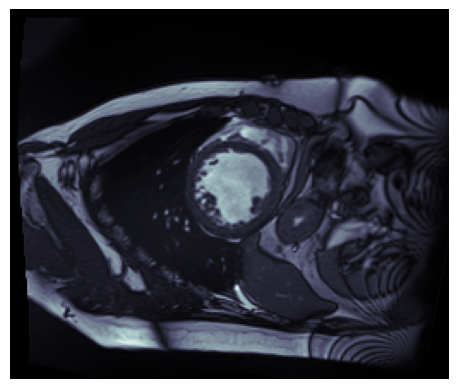

In [8]:
# The whole image
plt.imshow(nii_data_frame[:,:,5], cmap='bone')
plt.axis('off')
plt.show()

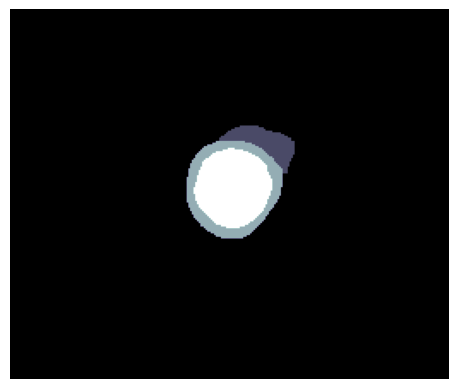

In [9]:
# The heart of the above image 
plt.imshow(nii_data_frame_gt[:,:,5], cmap='bone')
plt.axis('off')
plt.show()

<h2> 3.Data preprocessing </h2>

<p> As we mentioned before, we would like to use all of the slices of the 4D images. To get 2D images from 4D, we loop over the Z and T dimensions. After that, we do the downsampling and segment the images.  </p> 
<p> In this notebook we show the above processes for one example, but in our <b> data_preparation.py </b>, the code is written for all patient folders.</p>

<h3> 3.1 Downsampling </h3>

In [10]:
# Original shape
nii_data[:,:,0,0].shape

(216, 256)

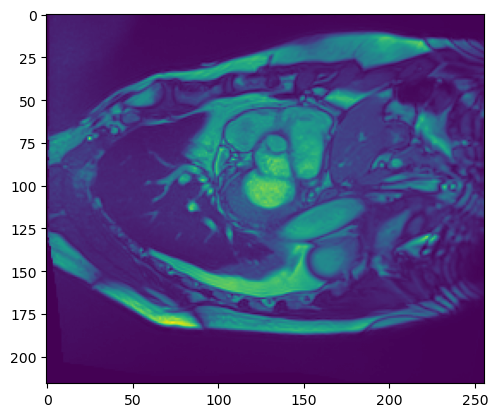

In [11]:
# Original image
plt.imshow(nii_data[:,:,0,0])

In [12]:
# New shape
downsample_img = downsample2d(nii_data[:,:,0,0],2)
downsample_img.shape

(108, 128)

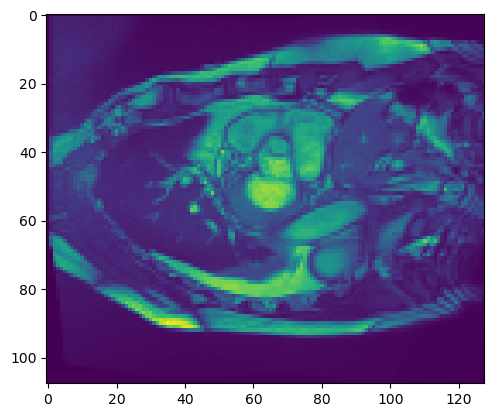

In [13]:
# New image
plt.imshow(downsample_img)

<h3> 3.2 Bounding box</h3>

In [14]:
nii_img_frame_1_gt  = nib.load(os.path.join(data_path,'raw_data/patient001/','patient001_frame01_gt.nii.gz'))
seg_frame_1 = nii_img_frame_1_gt.get_fdata()

nii_img_frame_2_gt  = nib.load(os.path.join(data_path,'raw_data/patient001/','patient001_frame12_gt.nii.gz'))
seg_frame_2 = nii_img_frame_2_gt.get_fdata()

In [15]:
 bbox_boundaries = bbox(seg_frame_1, seg_frame_2)

In [16]:
croped_img = crop_img(nii_data[:,:,0,0], bbox_boundaries)

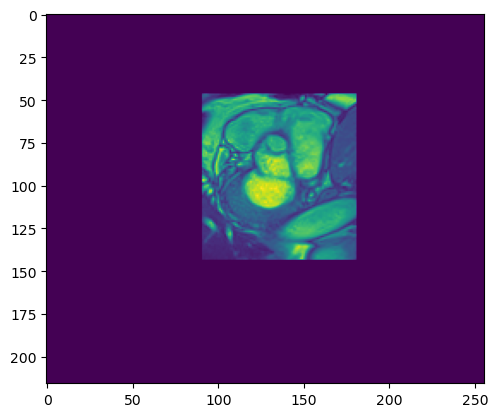

In [17]:
plt.imshow(croped_img)

<h3> 3.3 Saving data </h3>

In [18]:
from data_preparation import patient_train_split, data_transform_split

In [19]:
train, val, test = patient_train_split()

In [21]:
data_transform_split(data_path, train, "train")

Proccessing patient062 for the train set...
Proccessing patient008 for the train set...
Proccessing patient092 for the train set...
Proccessing patient001 for the train set...
Proccessing patient082 for the train set...
Proccessing patient025 for the train set...
Proccessing patient007 for the train set...
Proccessing patient011 for the train set...
Proccessing patient051 for the train set...
Proccessing patient021 for the train set...
Proccessing patient044 for the train set...
Proccessing patient068 for the train set...
Proccessing patient053 for the train set...
Proccessing patient019 for the train set...
Proccessing patient039 for the train set...
Proccessing patient096 for the train set...
Proccessing patient048 for the train set...
Proccessing patient034 for the train set...
Proccessing patient072 for the train set...
Proccessing patient077 for the train set...
Proccessing patient093 for the train set...
Proccessing patient005 for the train set...
Proccessing patient063 for the t

In [22]:
data_transform_split(data_path, val, "val")

Proccessing patient036 for the val set...
Proccessing patient054 for the val set...
Proccessing patient057 for the val set...
Proccessing patient081 for the val set...
Proccessing patient094 for the val set...
Proccessing patient083 for the val set...
Proccessing patient033 for the val set...
Proccessing patient099 for the val set...
Proccessing patient006 for the val set...
Proccessing patient015 for the val set...
Proccessing patient017 for the val set...
Proccessing patient045 for the val set...
Proccessing patient084 for the val set...
Proccessing patient004 for the val set...
Proccessing patient026 for the val set...
Proccessing patient085 for the val set...
Proccessing patient032 for the val set...
Proccessing patient022 for the val set...
Proccessing patient067 for the val set...
Proccessing patient056 for the val set...


Done in 43.82 seconds


In [20]:
data_transform_split(data_path, test, "test")

Proccessing patient069 for the test set...
Proccessing patient078 for the test set...
Proccessing patient013 for the test set...
Proccessing patient023 for the test set...
Proccessing patient041 for the test set...
Proccessing patient097 for the test set...
Proccessing patient070 for the test set...
Proccessing patient037 for the test set...
Proccessing patient086 for the test set...
Proccessing patient066 for the test set...


Done in 16.42 seconds
